In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'X-large'
rcParams['ytick.labelsize'] = 'X-large'

In [2]:
df = pd.read_excel('e-commerce.xlsx')
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [5]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [7]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [8]:
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


### Mengetahui value count unique tiap fitur

In [9]:
for col in nums:
    percent = round(df[col].value_counts()*100/len(df[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom CustomerID:
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64

Presentase :
 50001    0.02
53751    0.02
53759    0.02
53758    0.02
53757    0.02
         ... 
51876    0.02
51875    0.02
51874    0.02
51873    0.02
55630    0.02
Name: CustomerID, Length: 5630, dtype: float64
------------------------------

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Presentase :
 0    83.16
1    16.84
Name: Churn, dtype: float64
------------------------------

Value count kolom Tenure:
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29

In [10]:
for col in cats:
    percent = round(df[col].value_counts()*100/len(df[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Presentase :
 Mobile Phone    49.11
Computer        29.02
Phone           21.87
Name: PreferredLoginDevice, dtype: float64
------------------------------

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Presentase :
 Debit Card          41.10
Credit Card         26.66
E wallet            10.91
UPI                  7.35
COD                  6.48
CC                   4.85
Cash on Delivery     2.65
Name: PreferredPaymentMode, dtype: float64
------------------------------

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Presentase :
 Male      60.11
Female    39.89
Name: Gender, dtype: float64
-------------

In [11]:
df[nums].mode().reset_index()

,index,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,0.0,1.0,1.0,9.0,3.0,4.0,3.0,2.0,0.0,14.0,1.0,2.0,3.0,123.42
1,1,50002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.42
2,2,50003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.36
3,3,50004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,50005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,5625,55626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5626,5626,55627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5627,5627,55628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5628,5628,55629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Melihat distribusi data numerical

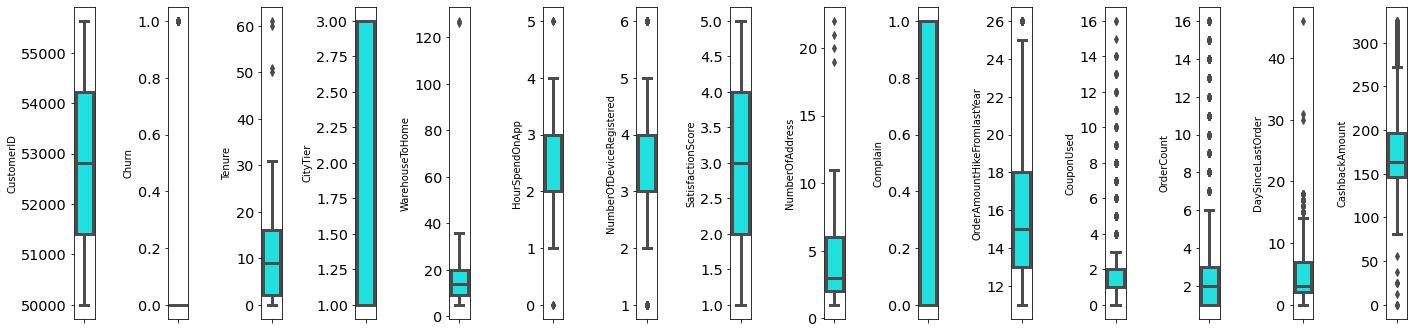

In [12]:
plt.figure(figsize=(20,5))

for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='cyan', orient='v')
    plt.tight_layout(pad = 2)

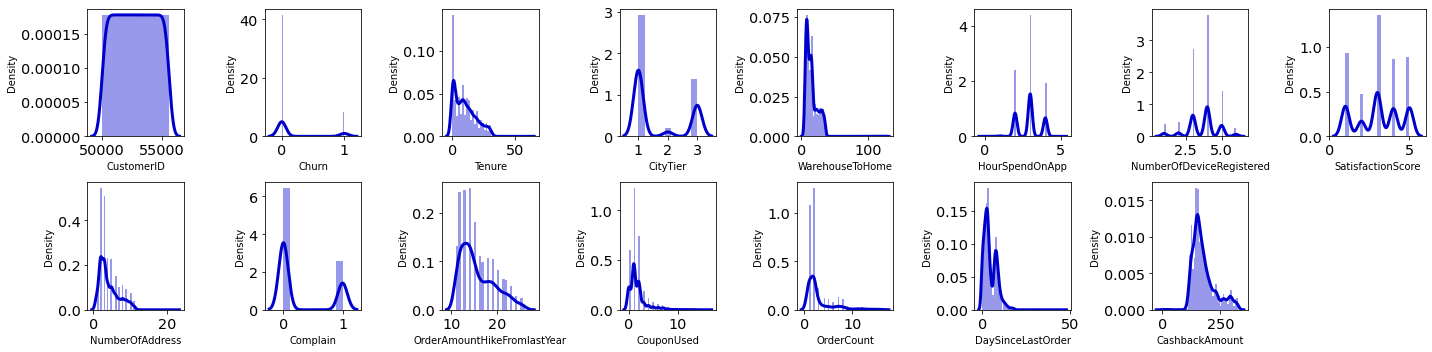

In [13]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.distplot(df[nums[i]], color='mediumblue')
    plt.tight_layout()

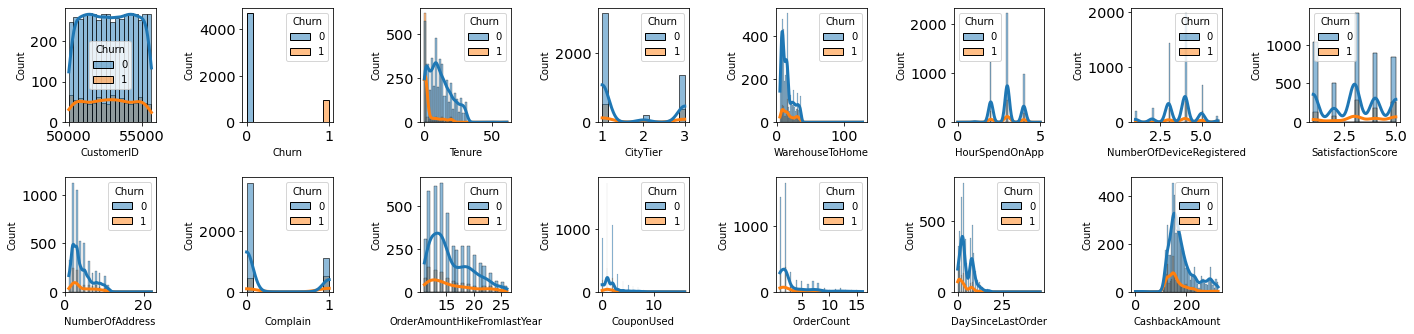

In [14]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.histplot(data=df, x=df[nums[i]],hue="Churn", kde="True")
    plt.tight_layout(pad = 2)

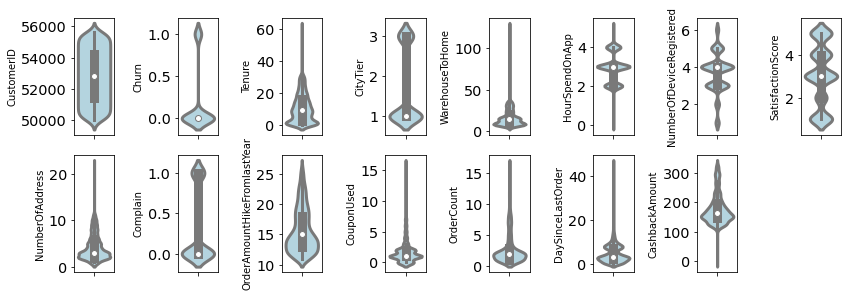

In [15]:
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.violinplot(y=df[nums[i]], color='lightblue', orient='v')
    plt.tight_layout(pad=1.5)

### Melihat distribusi data Categorical dengan Count Plot

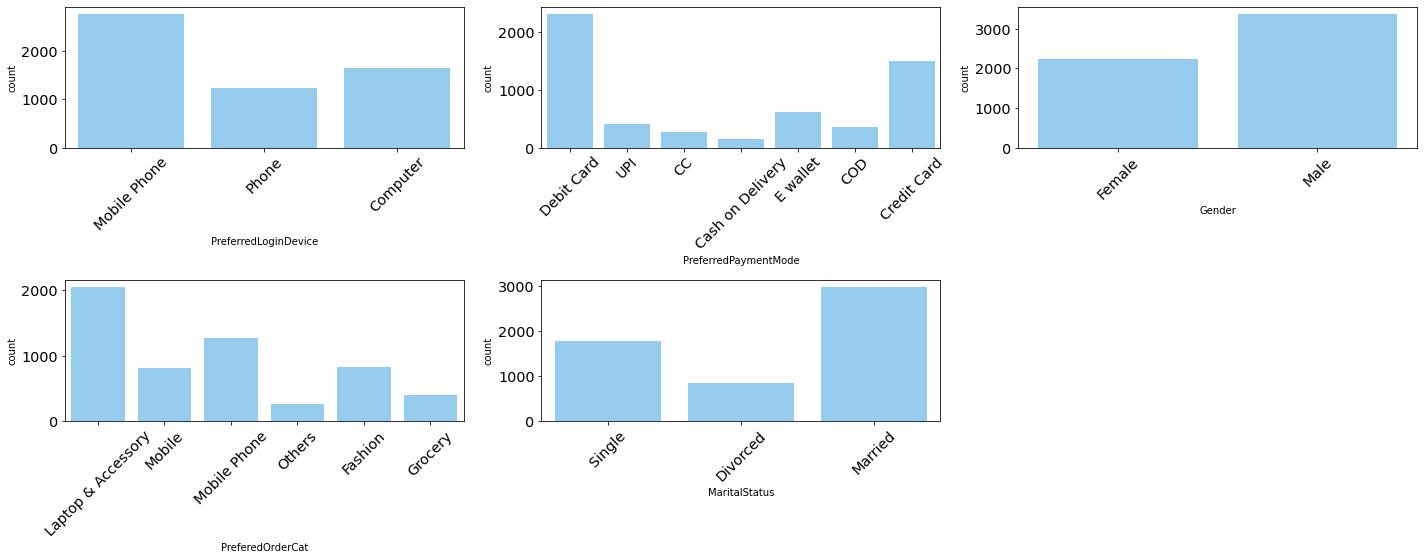

In [16]:
plt.figure(figsize=(20,8))
for i in range (0, len(cats[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[0:][i]], color='lightskyblue', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=1.5)

In [17]:
df.corr()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525


<AxesSubplot:>

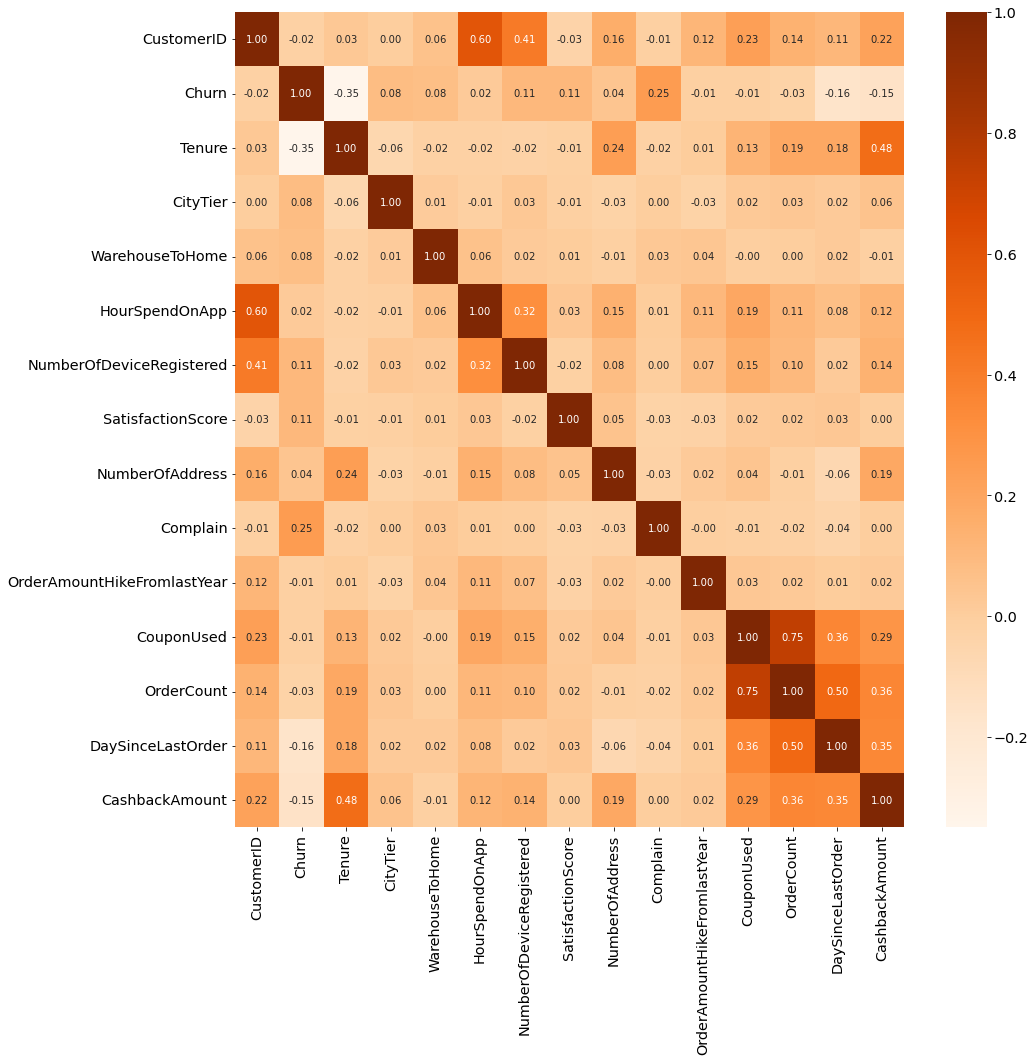

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Oranges', annot=True, fmt='.2f')


<Figure size 2880x2880 with 0 Axes>

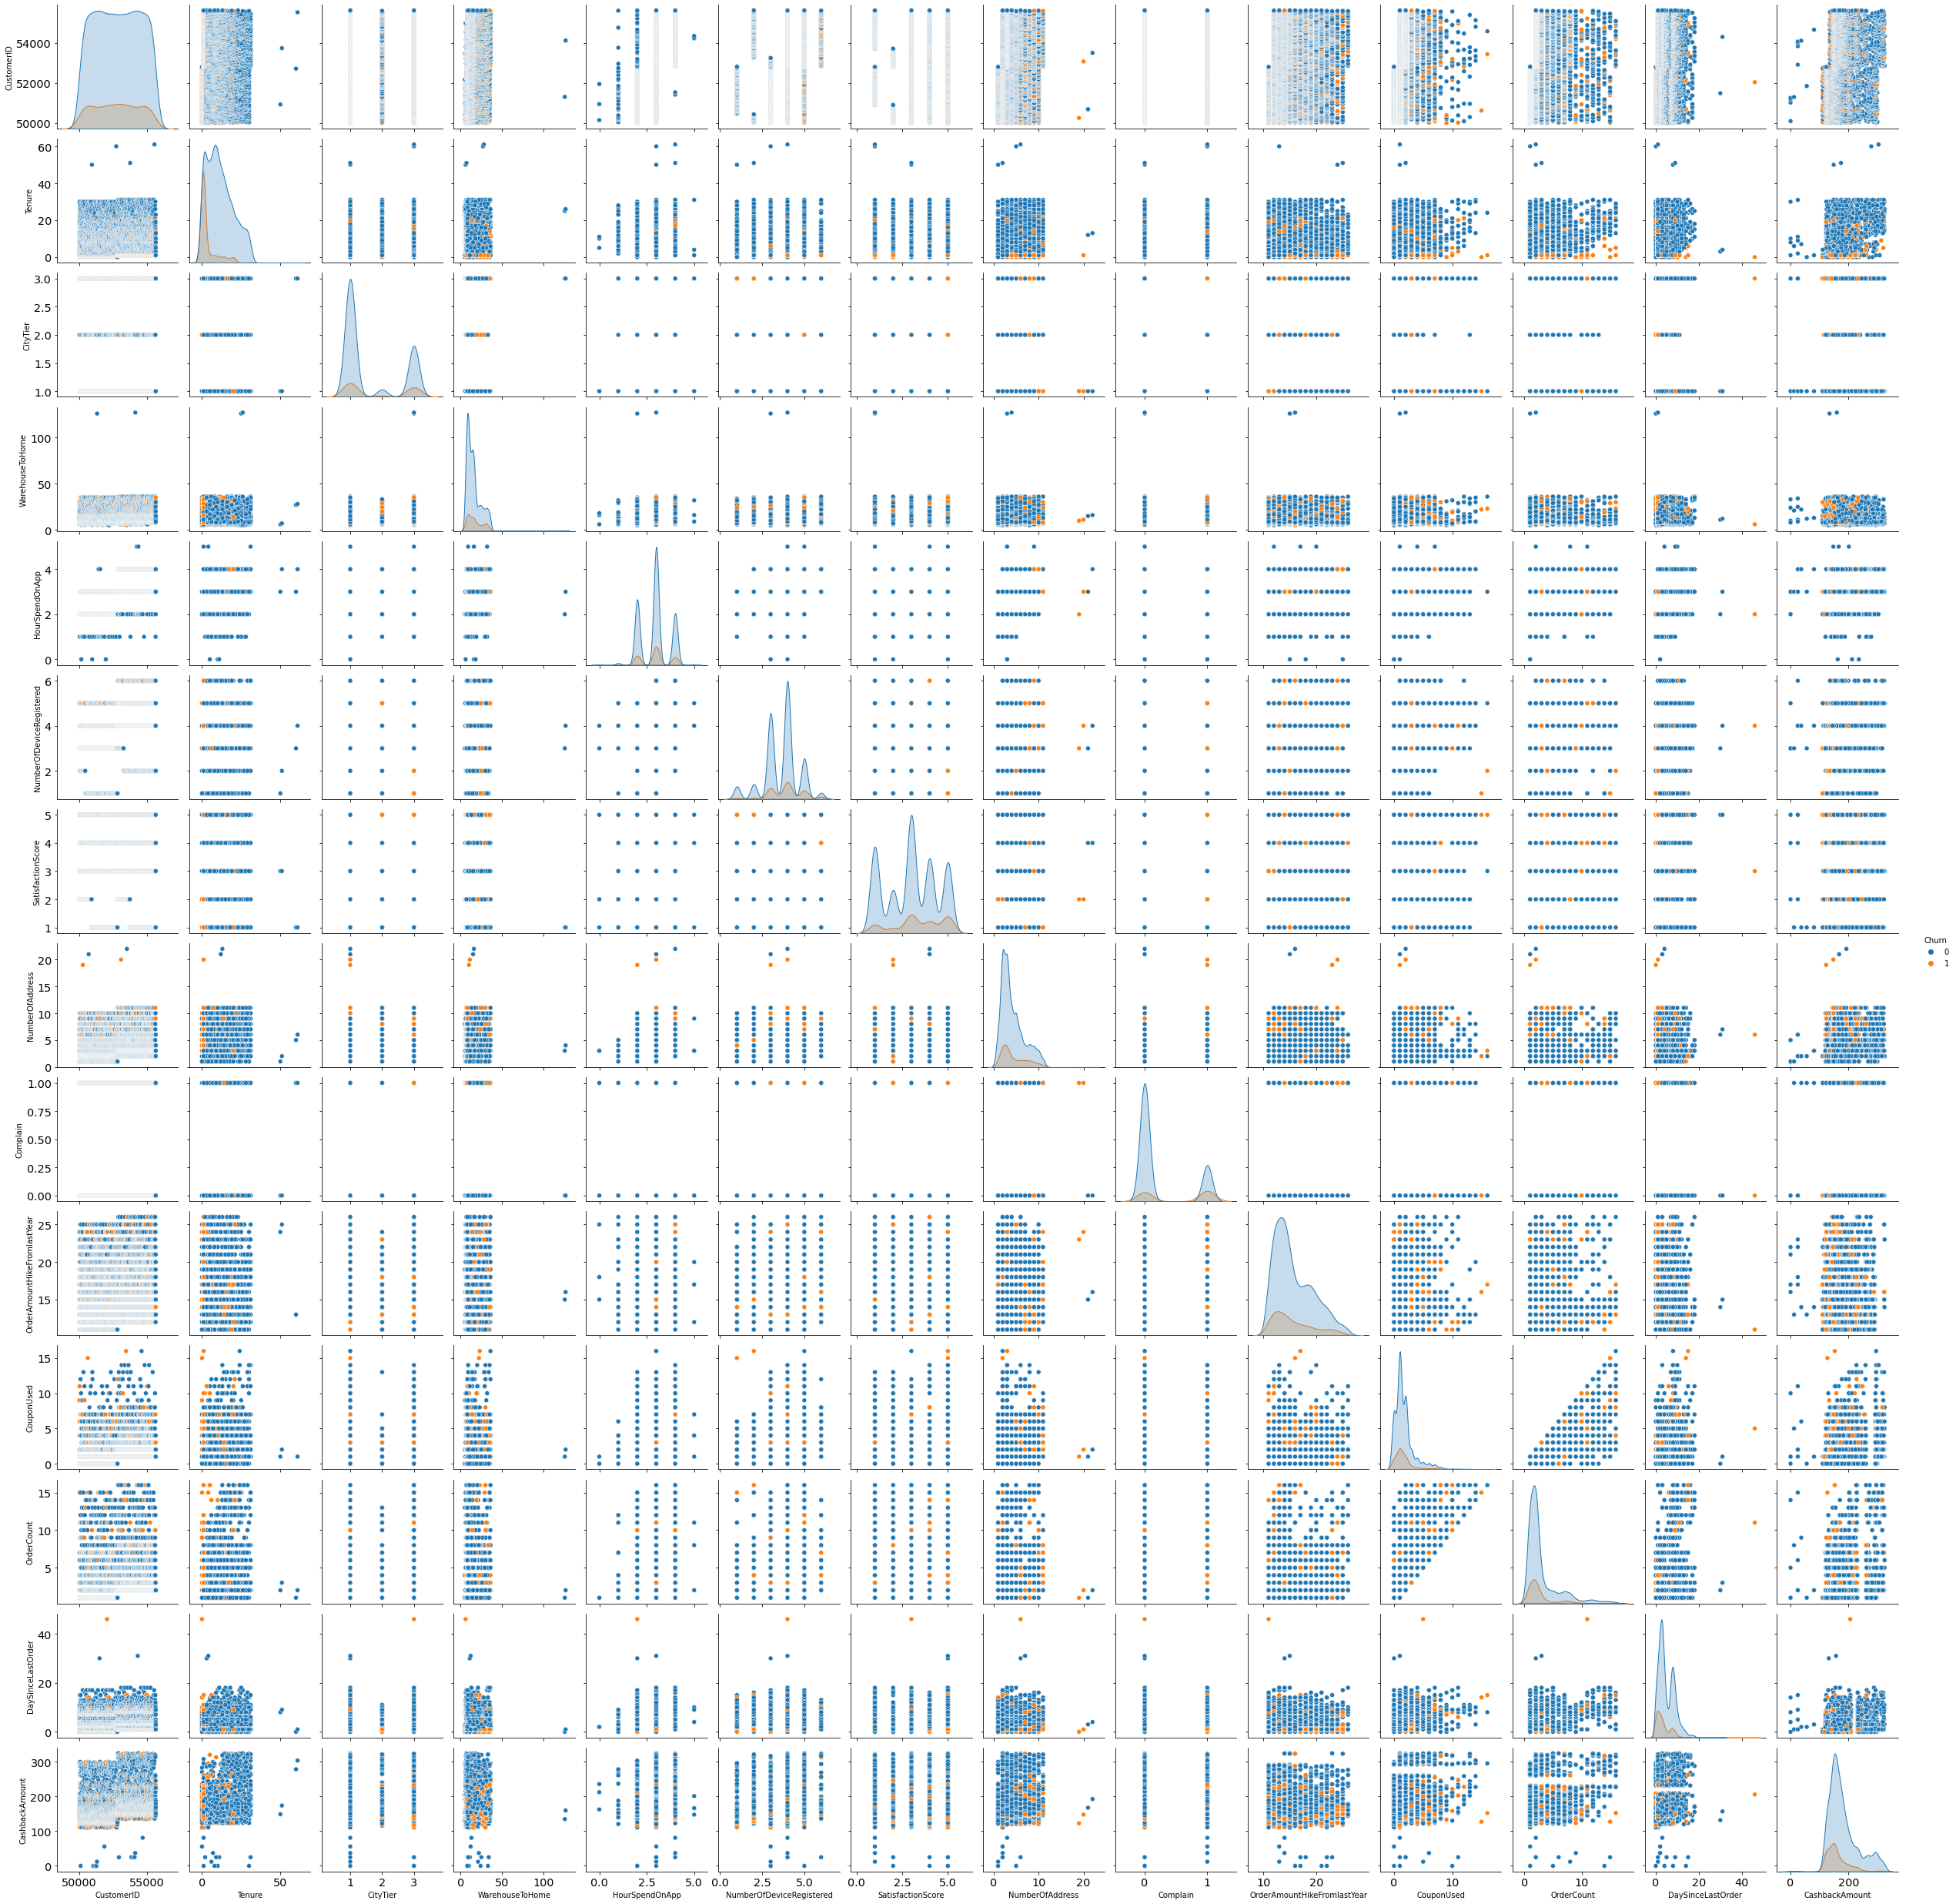

In [19]:
plt.figure(figsize=(40, 40))
sns.pairplot(df, diag_kind='kde', hue='Churn')
plt.savefig('heat01.png')

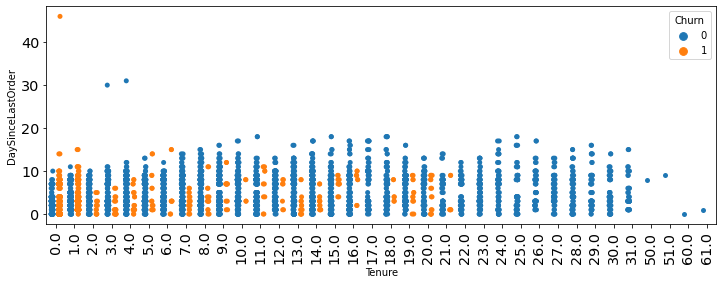

In [22]:
sns.stripplot(data=df, x="Tenure", y="DaySinceLastOrder", hue="Churn", dodge="True")
plt.tick_params(axis='x', rotation=90)

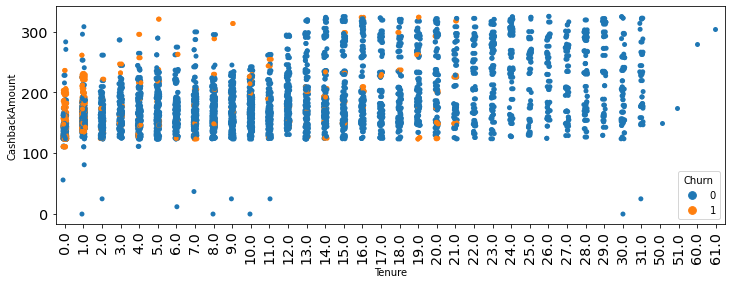

In [21]:
sns.stripplot(data=df, x="Tenure", y="CashbackAmount", hue="Churn")
plt.tick_params(axis='x', rotation=90)

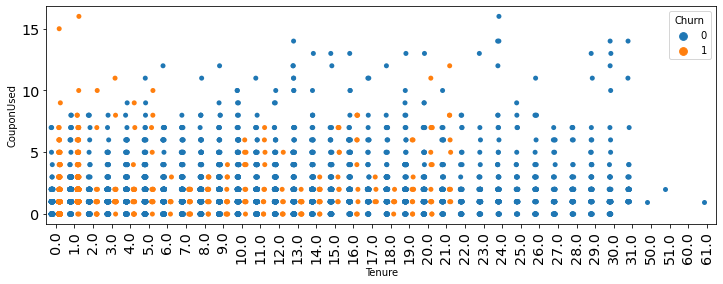

In [25]:
sns.stripplot(data=df, x="Tenure", y="CouponUsed", hue="Churn", dodge="True")
plt.tick_params(axis='x', rotation=90)

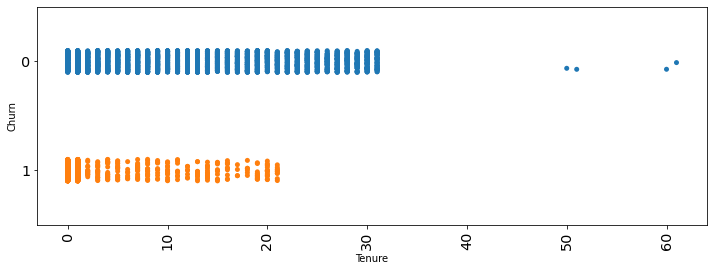

In [26]:
sns.stripplot(data=df, x="Tenure", y="Churn", orient="h")
plt.tick_params(axis='x', rotation=90)

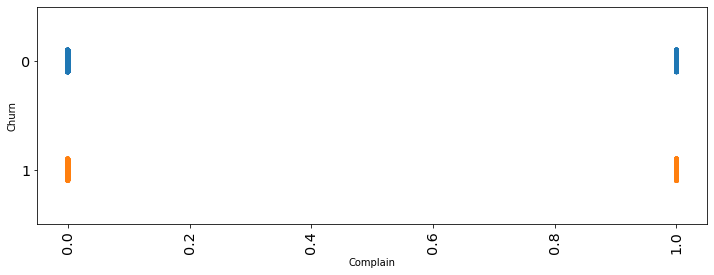

In [27]:
sns.stripplot(data=df, x="Complain", y="Churn", orient="h")
plt.tick_params(axis='x', rotation=90)

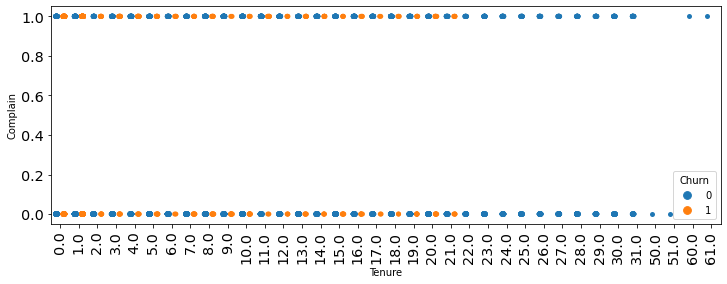

In [28]:
sns.stripplot(data=df, x="Tenure", y="Complain", hue="Churn", dodge="True")
plt.tick_params(axis='x', rotation=90)

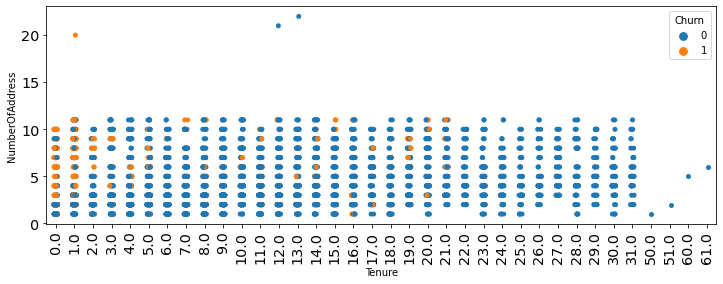

In [30]:
sns.stripplot(data=df, x="Tenure", y="NumberOfAddress", hue="Churn")
plt.tick_params(axis='x', rotation=90)

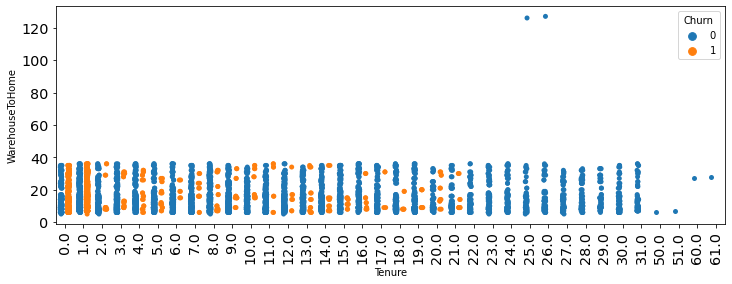

In [31]:
sns.stripplot(data=df, x="Tenure", y="WarehouseToHome", hue="Churn", dodge="True")
plt.tick_params(axis='x', rotation=90)